# Object Detection: Yolo v2

## Object Detection

<img src='imgs/object_detection_person_dog_horse.png' width='70%'/>

## Yolo (v2)

- Batch normalization
- Prior Box (k-means clustering)
- Features from fine grained and coarse grained grid

## Libraries

In [1]:
import random
import colorsys
from PIL import Image
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms

from yolo_v2 import YoloNet
from utils import *

use_gpu = torch.cuda.is_available()

## Helper functions

In [2]:
def load_model(num_classes, anchors, weights=None):
    yolo = YoloNet(num_classes, anchors)
    if weights:
        yolo.load_state_dict(torch.load(weights))
    return yolo.cuda() if torch.cuda.is_available() else yolo

In [3]:
def predict(model, image_path, image_size=(608, 608), score_threshold=0.5, nms_threshold=0.4, save_to=None):
    assert os.path.exists(image_path), 'Error! Input image does not exists.'
    img = Image.open(image_path).convert('RGB')
    tic = time.time()
    boxes = do_detect(model, img.resize(image_size), score_threshold, nms_threshold, use_cuda=use_gpu)
    toc = time.time()
    print("Prediction took {:.5f} ms.".format((toc - tic) * 1000))
    pred_img = plot_boxes(img, boxes, save_to, class_names) 
    return pred_img

## Parameters

In [4]:
# create model information
weight_file = 'weights/yolo.pth'

# anchor and classes information
class_names = open('data/coco.names').read().split('\n')
num_classes = len(class_names)

anchors = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]
anchor_num = 5

# input image information
image_size = (608, 608)

# demo parameter
# score_threshold = 0.5
# nms_threshold = 0.4
# iou_threshold = 0.6


## YOLO v2

In [5]:
model = load_model(num_classes, anchors, weight_file)

## Run detection

Prediction took 784.41238 ms.
horse: 0.301921
dog: 0.210519
person: 0.298499


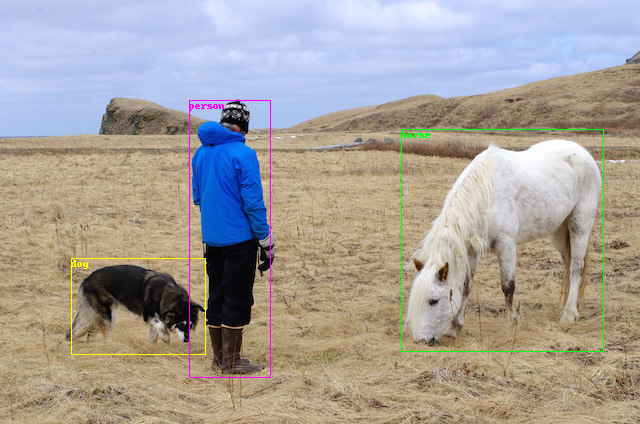

In [6]:
predict(model, 'data/person.jpg')

Prediction took 57.15084 ms.
truck: 0.403279
dog: 0.248420
boat: 0.111582


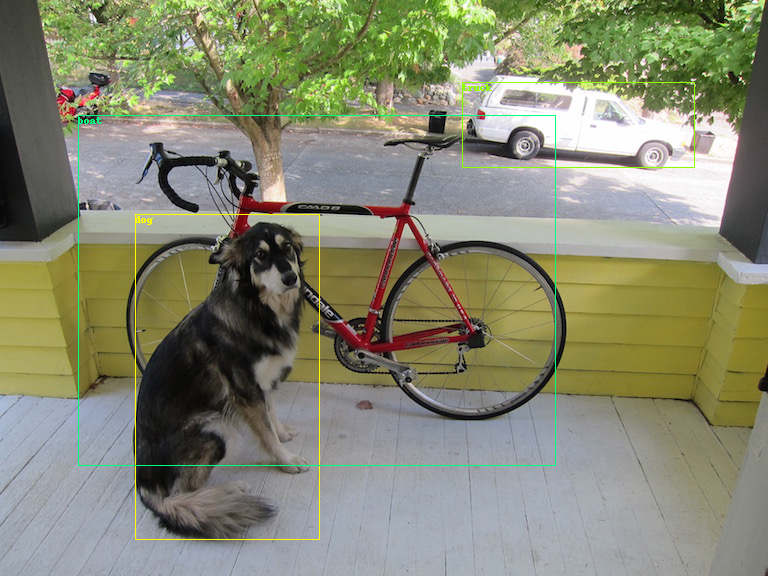

In [7]:
predict(model, 'data/dog.jpg')

Prediction took 57.27077 ms.
horse: 0.049542
zebra: 0.028921
horse: 0.115737
horse: 0.005366


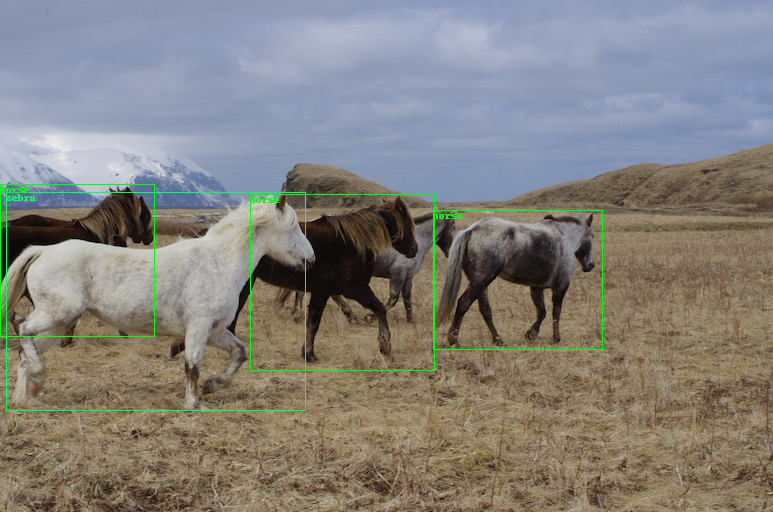

In [8]:
predict(model, 'data/horses.jpg')

Prediction took 57.15418 ms.
giraffe: 0.082759
zebra: 0.110691


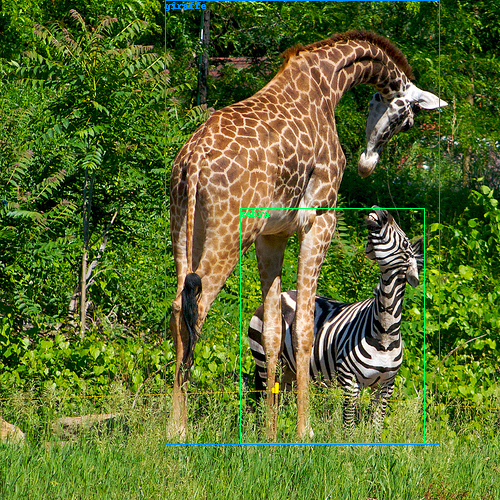

In [9]:
predict(model, 'data/giraffe.jpg')

Prediction took 58.17866 ms.
cake: 0.012079


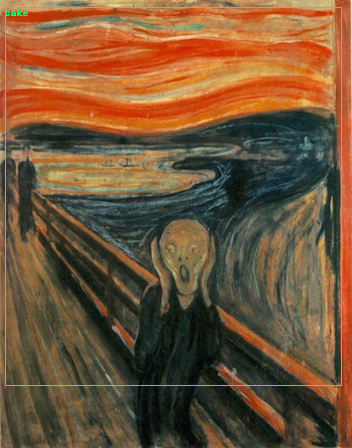

In [10]:
predict(model, 'data/scream.jpg')